# Top 200 Games Played on Twitch (2016-2021)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cf.go_offline()

In [3]:
# Saving the dataframe to a variable
df = pd.read_csv('Twitch_game_data.csv')

In [4]:
# Getting df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12750 entries, 0 to 12749
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              12750 non-null  int64  
 1   Game              12749 non-null  object 
 2   Month             12750 non-null  int64  
 3   Year              12750 non-null  int64  
 4   Hours_watched     12750 non-null  int64  
 5   Hours_Streamed    12750 non-null  object 
 6   Peak_viewers      12750 non-null  int64  
 7   Peak_channels     12750 non-null  int64  
 8   Streamers         12750 non-null  int64  
 9   Avg_viewers       12750 non-null  int64  
 10  Avg_channels      12750 non-null  int64  
 11  Avg_viewer_ratio  12750 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.2+ MB


In [5]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


# Basic EDA

In [6]:
# Updating 'Hours_Streamed' column to be numeric
df['Hours_Streamed'] = pd.to_numeric(df['Hours_Streamed'].apply(lambda hours: hours.split()[0]))

In [7]:
# Amount of different games that were top 200
df['Game'].nunique()

1639

In [8]:
# Average hours watched from 2016-2021
df['Hours_watched'].mean()

4275710.941411764

In [9]:
# Standard Deviation of hours watched from 2016-2021
df['Hours_watched'].std()

15067784.675417395

In [10]:
# Peak viewership of 'Escape From Tarkov'
df[df['Game'] == 'Escape From Tarkov']['Peak_viewers'].max()

441410

In [11]:
# Total hours 'Fortnite' was streamed from 2016-2021
df[df['Game'] == 'Fortnite']['Hours_Streamed'].sum()

265129395

In [12]:
# Creating a dataframe specifically for 2020
df_2020 = df[df['Year'] == 2020]

In [13]:
df_2020.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
9550,1,League of Legends,1,2020,99657869,2953365,349964,8083,237426,134129,3974,33.74
9551,2,Just Chatting,1,2020,88378302,1409820,631876,2959,214185,118947,1897,62.69
9552,3,Escape From Tarkov,1,2020,72356308,1043028,287491,2376,60579,97383,1403,69.37
9553,4,Fortnite,1,2020,53731549,4399954,595541,11303,502688,72317,5921,12.21
9554,5,Dota 2,1,2020,44025208,442024,364279,1055,30616,59253,594,99.60


In [14]:
# Total hours watched in 2020
df_2020['Hours_watched'].sum()

16976473071

In [15]:
# Peak viewership of 'CS:GO' in 2020
df_2020[df_2020['Game'] == 'Counter-Strike: Global Offensive']['Peak_viewers'].max()

828949

In [16]:
# Average of number of streamers that streamed 'Super Mario 64' in 2020
df_2020[df_2020['Game'] == 'Super Mario 64']['Streamers'].mean()

3721.6666666666665

# Visualization

In [17]:
#Amount of times/months each game has been rank one
rank_1 = df[df['Rank'] == 1]['Game'].value_counts()
rank_1

League of Legends                31
Fortnite                         16
Just Chatting                    13
VALORANT                          1
PLAYERUNKNOWN'S BATTLEGROUNDS     1
World of Warcraft                 1
Apex Legends                      1
Name: Game, dtype: int64

In [18]:
# Bar Graph for the number of months a game has spent as rank 1
rank_1.iplot(kind='bar', xTitle='Games', yTitle='Months',title='Months in Rank 1', color='red')

This bar graph represents the amount of months a game has been the most viewed/rank 1.
- League of Legends has spent the most months in rank 1 with 31 months
- Fortnite is 2nd with 16 months
- Just Chatting is 3rd with 13 months

- There are only 4 more games that have ever been rank 1 with only 1 month each

In [19]:
#Creating a groupby for 'Game' to add all 'Hours_watched' up
byGame = df.groupby('Game').sum().sort_values('Hours_watched',ascending=False).head(10)

In [20]:
#Plotting the top 10 games by viewership
byGame.iplot(kind='bar',y='Hours_watched',xTitle='Games',yTitle='Views (in Billions)',title='Top 10 Games by Total Viewership', color='blue')

This bar graph represents the top 10 games by their total viewership from 2016-2021

- League has the highest total viewership with 6.3 Billion viewers

<Figure size 1440x1440 with 0 Axes>

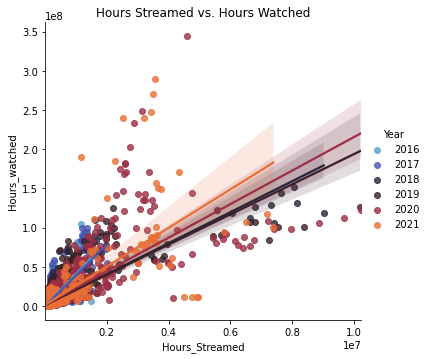

In [105]:
#Linear model plot between hours wathced and hours streamed (with a year as hue)

plt.figure(figsize=(20,20))

sns.lmplot(x='Hours_Streamed',y='Hours_watched',data=df,hue='Year',palette='icefire')

plt.title('Hours Watched vs. Hours Streamed')
plt.show()

A linear regression model comparing hours watched to hours streamed by year

- Each year there are increasingly more hours streamed than hours watched
- With the increase in popularity Twitch has seen a surge in streamers
 - Most of these streamers stream more hours than they are being watched

In [106]:
# Making the last day for each month in order to use datetime
# Datetime is needed to make visualizations based off date
def f(col):
    if col['Month'] == (1 or 3 or 5 or 7 or 8 or 10 or 12):
        res = 31
    elif col['Month'] == (4 or 6 or 9 or 11):
        res = 30
    else:
        res = 28
    return res


# Applying previous function to new 'Day' column
df['Day'] = df.apply(f,axis=1)

In [109]:
# Creating a 'Date' column to house the whole date for graphing purposes
df['Date'] = pd.to_datetime(df[['Year','Month','Day']],errors='coerce')


# Reordering the df so all date-related columns are next to each other
df = df[['Rank','Game','Day','Month','Year','Date','Hours_watched', 'Hours_Streamed','Peak_viewers','Peak_channels','Streamers',
        'Avg_viewers','Avg_channels','Avg_viewer_ratio']]

In [86]:
# Creating a scatter plot of Super Mario 64 peak viewership over the course of 2016-2021
df[df['Game']=='Super Mario 64'].iplot(kind='scatter',x='Date',y='Peak_viewers',color='purple',
                                      xTitle='Date',yTitle='Views (by Thousand)',
                                       title='Peak Viewership of Super Mario 64 (2016-2021)')

A scatter plot used to view peak viewership of Super Mario 64 from 2016-2021

- SM64 hit its all time viewer peak in July 2017
- SM64 seems to get a surge of viewership once a year
 - It is stagnant the rest of the time

In [87]:
# Creating a scatterplot of the total hours watched on Twitch from 2016-2021
df.groupby('Date').sum()['Hours_watched'].iplot(y='Hours_watched', color='Green',
                                               xTitle='Date',yTitle='Hours (in Billions)',title='Hours of Twitch Watched (2016-2021)')

A scatter plot representing the amount of hours watched of Twitch from 2016-2021

- Twitch had a huge spike in viewership starting in February of 2020
 - This is due to the need for entertainment during the Covid-19 Pandemic
- Twitch's viewership has been continuously increaing from 2016 to now

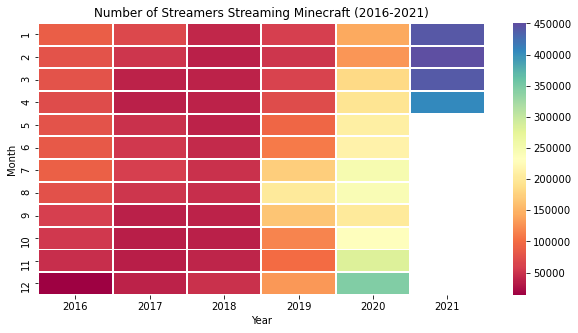

In [93]:
# Pivot table of Minecraft that includes the month, year, and number of streamers
MC_pivot = df[df['Game'] == 'Minecraft'].pivot_table(index='Month',columns='Year',values='Streamers')



# Taking the pivot table and turning it into a heatmap
plt.figure(figsize=(10,5))

sns.heatmap(MC_pivot,cmap='Spectral',linecolor='white',linewidths=1)

plt.title('Number of Streamers Streaming Minecraft (2016-2021)')

plt.show()

Heatmap of the number of streamers that streamed Minecraft from 2016-2021

- Minecraft was only streamed by about 50,000 streamers from 2016-2019
- Minecraft saw a big surge in popularity in mid 2019
    - During this time the amount of streamers increased to 150,000-200,000
- Minecraft had an even bigger surge in 2020 due to the resurgence of the game and the Covid-19 pandemic
    - Streamers increased to 250,000-450,000